## Neste projeto, temos como objetivo:
* Demonstrar em forma gráfica a evolução de mortes e feridos por grupo perpetrador (selecionando os dez primeiros em ocorrência) ao longo das décadas de 1970 a 2020 no território da Índia.
* Demonstrar em forma gráfica a evolução dos alvos dos ataques terroristas, também selecionando os dez alvos com maior ocorrência.
* Visualizar graficamente a evolução dos tipos de ataque

#### Importando as bibliotecas

In [480]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Lendo o dataframe

In [481]:
# O dataframe original foi transformado em arquivo xlsx para poder modificar algumas datas incompatíveis com o pd.to_datetime
dados = pd.read_excel('india.xlsx')
dados.head()

,GTD ID,DATE,COUNTRY,CITY,PERPETRATOR GROUP,FATALITIES,INJURED,TARGET TYPE,REGION,ATTACK TYPE,WEAPON TYPE
0,20200000000000000,2020-12-31,India,Sangam,Unknown,0,1,Police,South Asia,Armed Assault,"Explosives,Firearms"
1,20200000000000000,2020-12-31,India,Srinagar,The Resistance Front (TRF),1,0,Business,South Asia,Armed Assault,Firearms
2,20200000000000000,2020-12-30,India,Malakangiri,Maoists,0,1,Military,South Asia,Bombing/Explosion,"Explosives,Explosives"
3,20200000000000000,2020-12-30,India,Jandi,Unknown,0,0,Religious Figures/Institutions,South Asia,Bombing/Explosion,Explosives
4,20200000000000000,2020-12-30,India,Pusnar,Maoists,0,1,Unknown,South Asia,Bombing/Explosion,"Explosives,Explosives"


In [482]:
dados.shape

(14029, 11)

In [483]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14029 entries, 0 to 14028
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   GTD ID             14029 non-null  int64         
 1   DATE               14029 non-null  datetime64[ns]
 2   COUNTRY            14029 non-null  object        
 3   CITY               14029 non-null  object        
 4   PERPETRATOR GROUP  14029 non-null  object        
 5   FATALITIES         14029 non-null  object        
 6   INJURED            14029 non-null  object        
 7   TARGET TYPE        14029 non-null  object        
 8   REGION             14029 non-null  object        
 9   ATTACK TYPE        14029 non-null  object        
 10  WEAPON TYPE        14029 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.2+ MB


In [484]:
# dados['PERPETRATOR GROUP'].unique()

#### Tratamento dos dados

In [485]:
# Removendo os dados não numéricos
dados_tratados = dados[pd.to_numeric(dados['FATALITIES'], errors='coerce').notnull()]
dados_tratados = dados_tratados[pd.to_numeric(dados_tratados['INJURED'], errors='coerce').notnull()]

In [486]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13491 entries, 0 to 14028
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   GTD ID             13491 non-null  int64         
 1   DATE               13491 non-null  datetime64[ns]
 2   COUNTRY            13491 non-null  object        
 3   CITY               13491 non-null  object        
 4   PERPETRATOR GROUP  13491 non-null  object        
 5   FATALITIES         13491 non-null  object        
 6   INJURED            13491 non-null  object        
 7   TARGET TYPE        13491 non-null  object        
 8   REGION             13491 non-null  object        
 9   ATTACK TYPE        13491 non-null  object        
 10  WEAPON TYPE        13491 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.2+ MB


In [487]:
dados_tratados['DATE'].isna().any()


False

In [488]:
dados_tratados['FATALITIES'] = dados_tratados['FATALITIES'].astype(int)
dados_tratados['INJURED'] = dados_tratados['INJURED'].astype(int)


In [489]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13491 entries, 0 to 14028
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   GTD ID             13491 non-null  int64         
 1   DATE               13491 non-null  datetime64[ns]
 2   COUNTRY            13491 non-null  object        
 3   CITY               13491 non-null  object        
 4   PERPETRATOR GROUP  13491 non-null  object        
 5   FATALITIES         13491 non-null  int32         
 6   INJURED            13491 non-null  int32         
 7   TARGET TYPE        13491 non-null  object        
 8   REGION             13491 non-null  object        
 9   ATTACK TYPE        13491 non-null  object        
 10  WEAPON TYPE        13491 non-null  object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(7)
memory usage: 1.1+ MB


In [490]:
dados_tratados['DECADE'] = (dados_tratados['DATE'].dt.year // 10) * 10
dados_tratados['COMBINED'] = dados_tratados['FATALITIES'] + dados_tratados['INJURED']
dados_tratados.head()

,GTD ID,DATE,COUNTRY,CITY,PERPETRATOR GROUP,FATALITIES,INJURED,TARGET TYPE,REGION,ATTACK TYPE,WEAPON TYPE,DECADE,COMBINED
0,20200000000000000,2020-12-31,India,Sangam,Unknown,0,1,Police,South Asia,Armed Assault,"Explosives,Firearms",2020,1
1,20200000000000000,2020-12-31,India,Srinagar,The Resistance Front (TRF),1,0,Business,South Asia,Armed Assault,Firearms,2020,1
2,20200000000000000,2020-12-30,India,Malakangiri,Maoists,0,1,Military,South Asia,Bombing/Explosion,"Explosives,Explosives",2020,1
3,20200000000000000,2020-12-30,India,Jandi,Unknown,0,0,Religious Figures/Institutions,South Asia,Bombing/Explosion,Explosives,2020,0
4,20200000000000000,2020-12-30,India,Pusnar,Maoists,0,1,Unknown,South Asia,Bombing/Explosion,"Explosives,Explosives",2020,1


#### Agrupando os grupos perpetradores por década

In [491]:
agrupamento_decada = dados_tratados.groupby(['DECADE', 'PERPETRATOR GROUP'])['COMBINED'].sum().reset_index()
agrupamento_decada.head()

,DECADE,PERPETRATOR GROUP,COMBINED
0,1970,Ananda Marga (suspected),4
1,1970,Japanese Red Army (JRA),0
2,1970,Maoists (suspected),1
3,1970,Meitei extremists,4
4,1970,Mizo National Front,13


#### Checando a ordem dos grupos perpetradores com maior ocorrência ao longo das décadas

In [492]:
ordem = dados_tratados.groupby(['PERPETRATOR GROUP'])['COMBINED'].sum().sort_values(ascending = False)
ordem.head(10)

PERPETRATOR GROUP
Unknown                                                       15633
Sikh Extremists                                                4234
Communist Party of India - Maoist (CPI-Maoist)                 2182
Lashkar-e-Taiba (LeT)                                          2130
Communist Party of India - Maoist (CPI-Maoist) (suspected)     2104
Maoists                                                        2072
United Liberation Front of Assam (ULFA) (suspected)            1231
United Liberation Front of Assam (ULFA)                         984
Muslim Militants                                                823
Hizbul Mujahideen (HM)                                          812
Name: COMBINED, dtype: int32

#### Como os atentandos de autoria desconhecida (unknown) representam um valor muito maior do que os outros grupos, serão representados à parte e comparados com os outros grupos somados que não estão entre os 9 grupos perpetradores lí em ocorrência

In [493]:
agrupamento_decada_filtro = agrupamento_decada[agrupamento_decada['PERPETRATOR GROUP'].isin(ordem.index[1:11])].reset_index(drop = True)
agrupamento_decada_filtro = agrupamento_decada_filtro.groupby(['DECADE', 'PERPETRATOR GROUP'])['COMBINED'].sum().reset_index()
agrupamento_decada_filtro

,DECADE,PERPETRATOR GROUP,COMBINED
0,1980,Bodo Militants,280
1,1980,Maoists,7
2,1980,Muslim Militants,24
3,1980,Sikh Extremists,1947
4,1980,United Liberation Front of Assam (ULFA),117
5,1990,Bodo Militants,492
6,1990,Hizbul Mujahideen (HM),96
7,1990,Lashkar-e-Taiba (LeT),41
8,1990,Maoists,23
9,1990,Muslim Militants,778


#### Representação gráfica

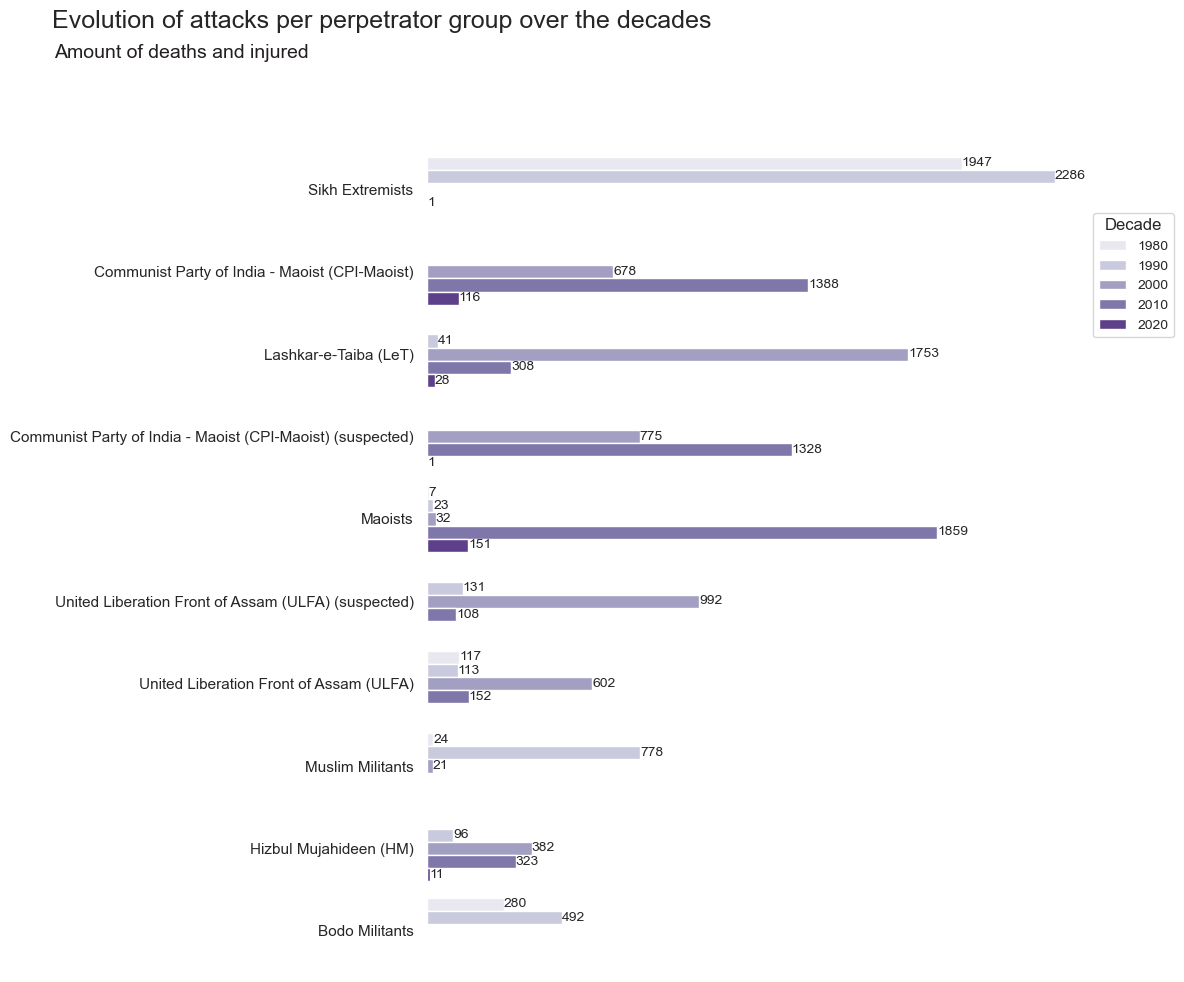

In [494]:
plt.figure(figsize=(12, 10))

palette = sns.color_palette("Purples", n_colors=len(agrupamento_decada_filtro['DECADE'].unique()))

sns.set_theme(style="white")

# Usar barplot para criar um gráfico de barras empilhadas
ax = sns.barplot(
    data = agrupamento_decada_filtro, y = "PERPETRATOR GROUP", x = "COMBINED",
    hue = "DECADE", palette = palette, order = ordem.index[1:11], width = 0.8
)

# Adicionar os valores numéricos dentro das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verificar se width é NaN
    if pd.isna(width):
        width = 0  # Substituir NaN por 0 para evitar erro

    # Adicionar o valor do número ao lado direito da barra, alinhado verticalmente com a altura da barra
    if width > 0:
        ax.text(x + width + 0.05, y + height / 2, f'{int(width)}', ha='left', va='center', fontsize = 10)
        
# Adicionar título
plt.suptitle('Evolution of attacks per perpetrator group over the decades', size = 18, ha='right', x = 0.6, y = 0.98)
plt.title('Amount of deaths and injured', fontsize = 14, color = '#231F20', ha = "right", x = -0.18, y = 1.1)

ax.legend(title = 'Decade', bbox_to_anchor = (1, 0.93), bbox_transform = ax.transAxes, fontsize = 10, loc = 'upper left')

# Remover o rótulo do eixo y
ax.set_xlabel('')

ax.set_xticklabels([])

# Remover o rótulo do eixo y
ax.set_ylabel('')

# Ajustar layout
plt.tight_layout()

ax.set_frame_on(False)

plt.savefig('grafico1.png')

# Mostrar o gráfico
plt.show()





#### Agrupando os demais grupos perpetradores em uma categoria única denominada "Others"

In [495]:
outros = agrupamento_decada[agrupamento_decada['PERPETRATOR GROUP'].isin(ordem.index[11:])].reset_index(drop = True)
outros['PERPETRATOR GROUP'] = 'Others'
outros = outros.groupby(['DECADE', 'PERPETRATOR GROUP'])['COMBINED'].sum().reset_index()
outros

,DECADE,PERPETRATOR GROUP,COMBINED
0,1970,Others,51
1,1980,Others,1742
2,1990,Others,4753
3,2000,Others,6708
4,2010,Others,3612
5,2020,Others,134


#### Selecionando apenas os atentados de autoria desconhecida

In [496]:
desconhecido = agrupamento_decada[agrupamento_decada['PERPETRATOR GROUP'] == 'Unknown'].reset_index(drop = True)
desconhecido

,DECADE,PERPETRATOR GROUP,COMBINED
0,1970,Unknown,3
1,1980,Unknown,2088
2,1990,Unknown,4885
3,2000,Unknown,6115
4,2010,Unknown,2392
5,2020,Unknown,150


#### Concatenando "Others" com "Unknown"

In [497]:
outros_desconhecido = pd.concat([outros, desconhecido], ignore_index = True)
outros_desconhecido

,DECADE,PERPETRATOR GROUP,COMBINED
0,1970,Others,51
1,1980,Others,1742
2,1990,Others,4753
3,2000,Others,6708
4,2010,Others,3612
5,2020,Others,134
6,1970,Unknown,3
7,1980,Unknown,2088
8,1990,Unknown,4885
9,2000,Unknown,6115


#### Representação gráfica

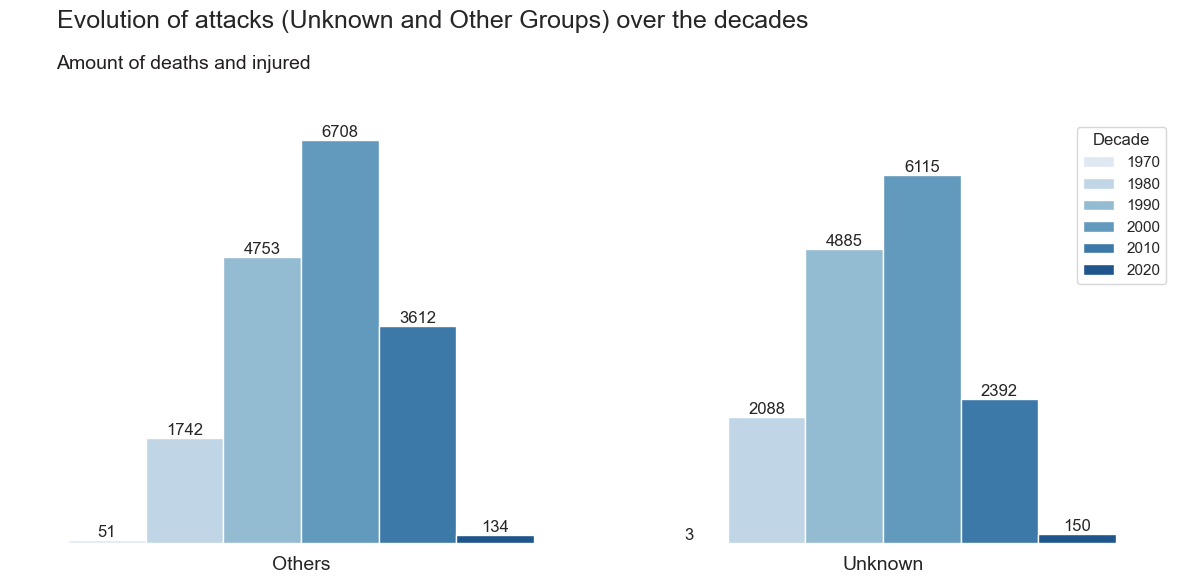

In [513]:
# Configurar o estilo do Seaborn para o fundo branco
sns.set_theme(style="white")

# Calcular a ordem dos "TARGET TYPE" pelo total
order = outros_desconhecido.groupby('PERPETRATOR GROUP')['COMBINED'].sum().sort_values(ascending=False).index

# Criar o gráfico de barras empilhadas com Seaborn
plt.figure(figsize=(12, 6))

# Usar barplot para criar um gráfico de barras empilhadas
ax = sns.barplot(
    data = outros_desconhecido, x = "PERPETRATOR GROUP", y = "COMBINED",
    hue = "DECADE", palette = palette, order=order
)

# # Adicionar título
plt.suptitle('Evolution of attacks (Unknown and Other Groups) over the decades', size = 18, ha='right', x = 0.68, y = 0.97)
plt.title('Amount of deaths and injured', fontsize = 14, color = '#231F20', ha = "right", x = 0.258, y = 1.1)

# Definir os rótulos do eixo x e rotacioná-los
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center", fontsize=14)  # Ajuste de fontsize

# Remover o rótulo do eixo x
ax.set_xlabel('')

ax.set_ylabel('')

ax.set_yticklabels([])

# Adicionar os valores numéricos dentro das barras, acima do topo
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Evitar exibir números para barras vazias
        ax.annotate(f'{height:.0f}', (x + width / 2, y + height),
                    ha='center', va='bottom', xytext=(0, 0), textcoords='offset points', fontsize=12)  # Ajustes

# Ajustar layout
plt.tight_layout()

# Mudar o nome da legenda "DECADE" para "Decade"
ax.legend(title = 'Decade')

ax.set_frame_on(False)

plt.savefig('grafico2.png')

# Mostrar o gráfico
plt.show()




#### Novo tratamento de dados para selecionar os dados não nulos dos alvos dos ataques terroristas

In [499]:
dados_tratados2 = dados.copy()

In [500]:
dados_tratados2['DECADE'] = dados_tratados2['DATE'].dt.year // 10 * 10
dados_tratados2

,GTD ID,DATE,COUNTRY,CITY,PERPETRATOR GROUP,FATALITIES,INJURED,TARGET TYPE,REGION,ATTACK TYPE,WEAPON TYPE,DECADE
0,20200000000000000,2020-12-31,India,Sangam,Unknown,0,1,Police,South Asia,Armed Assault,"Explosives,Firearms",2020
1,20200000000000000,2020-12-31,India,Srinagar,The Resistance Front (TRF),1,0,Business,South Asia,Armed Assault,Firearms,2020
2,20200000000000000,2020-12-30,India,Malakangiri,Maoists,0,1,Military,South Asia,Bombing/Explosion,"Explosives,Explosives",2020
3,20200000000000000,2020-12-30,India,Jandi,Unknown,0,0,Religious Figures/Institutions,South Asia,Bombing/Explosion,Explosives,2020
4,20200000000000000,2020-12-30,India,Pusnar,Maoists,0,1,Unknown,South Asia,Bombing/Explosion,"Explosives,Explosives",2020
...,...,...,...,...,...,...,...,...,...,...,...,...
14024,19800000000000000,1979-01-13,India,Unknown,Naga People,Unknown,Unknown,Police,South Asia,Armed Assault,Firearms,1970
14025,19800000000000000,1977-09-28,India,Bombay,Japanese Red Army (JRA),0,0,Airports and Aircraft,South Asia,Hijacking,"Firearms,Explosives",1970
14026,19800000000000000,1976-05-26,India,New Delhi,Unknown,0,0,Airports and Aircraft,South Asia,Bombing/Explosion,Explosives,1970
14027,19800000000000000,1975-01-02,India,Samastipur,Ananda Marga (suspected),4,0,"Government (General),Police",South Asia,Bombing/Explosion,Explosives,1970


#### Contabilizando os alvos

In [501]:
alvo = dados_tratados2.groupby('DECADE')['TARGET TYPE'].value_counts()
alvo = alvo.rename('COUNT').reset_index()
alvo

,DECADE,TARGET TYPE,COUNT
0,1970,Police,8
1,1970,Government (General),7
2,1970,Airports and Aircraft,3
3,1970,Private Citizens & Property,2
4,1970,"Government (General),Police",1
...,...,...,...
309,2020,"Police,Police,Private Citizens & Property",1
310,2020,"Police,Transportation",1
311,2020,"Private Citizens & Property,Police",1
312,2020,"Transportation,Military",1


#### Checando a ordem de incidência

In [502]:
ordem = alvo.groupby(['TARGET TYPE'])['COUNT'].sum().sort_values(ascending = False)
ordem

TARGET TYPE
Private Citizens & Property                                         3484
Police                                                              2583
Government (General)                                                1797
Business                                                            1285
Military                                                            1023
                                                                    ... 
Military,Private Citizens & Property,Police                            1
Business,Private Citizens & Property,Private Citizens & Property       1
Military,Police,Police                                                 1
Military,Food or Water Supply                                          1
Violent Political Party,Violent Political Party                        1
Name: COUNT, Length: 164, dtype: int64

#### Selecionado os nove primeiros alvos de maior incidência e agrupando

In [503]:
alvo_top_9 = alvo[alvo['TARGET TYPE'].isin(ordem.index[:9])].reset_index(drop = True)
alvo_top_9 = alvo_top_9.groupby(['DECADE', 'TARGET TYPE'])['COUNT'].sum().reset_index()
alvo_top_9.head()

,DECADE,TARGET TYPE,COUNT
0,1970,Government (General),7
1,1970,Police,8
2,1970,Private Citizens & Property,2
3,1970,Transportation,1
4,1980,Business,98


#### Agrupando os demais alvos como 'Others'

In [504]:
outros = alvo[alvo['TARGET TYPE'].isin(ordem.index[9:])].reset_index(drop = True)
outros['TARGET TYPE'] = 'Others'
outros = outros.groupby(['DECADE', 'TARGET TYPE'])[['COUNT']].sum().reset_index()
outros

,DECADE,TARGET TYPE,COUNT
0,1970,Others,6
1,1980,Others,107
2,1990,Others,133
3,2000,Others,472
4,2010,Others,880
5,2020,Others,70


#### Concatenando os dados

In [505]:
concatenacao = pd.concat([alvo_top_9, outros], ignore_index = True)

#### Representação gráfica

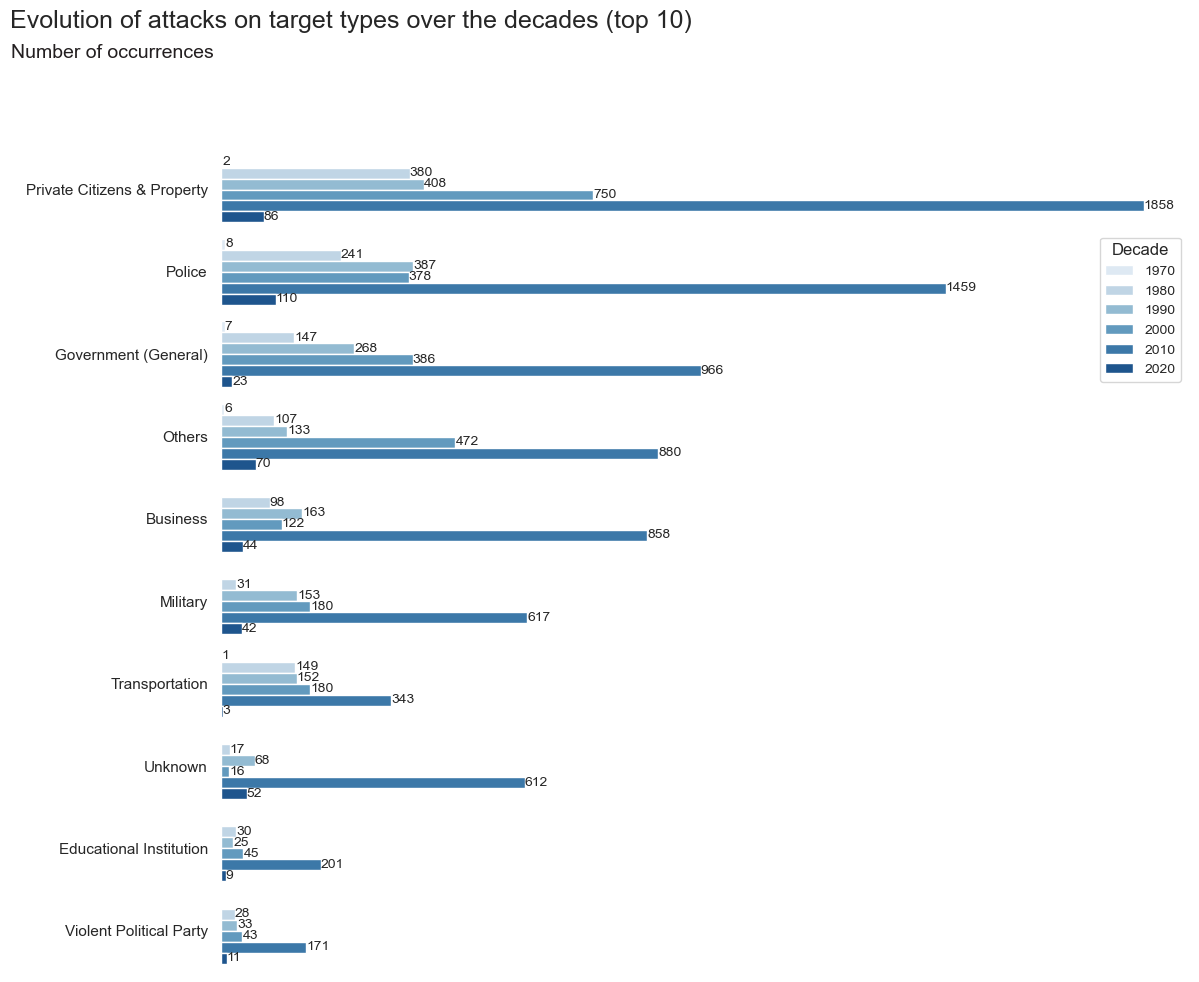

In [506]:
plt.figure(figsize=(12, 10))

palette = sns.color_palette("Blues", n_colors=len(concatenacao['DECADE'].unique()))

order = concatenacao.groupby('TARGET TYPE')['COUNT'].sum().sort_values(ascending=False).index

sns.set_theme(style="white")

# Usar barplot para criar um gráfico de barras empilhadas
ax = sns.barplot(
    data = concatenacao, y = "TARGET TYPE", x = "COUNT",
    hue = "DECADE", palette = palette, order = order, width = 0.8
)

# Adicionar os valores numéricos dentro das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verificar se width é NaN
    if pd.isna(width):
        width = 0  # Substituir NaN por 0 para evitar erro

    # Adicionar o valor do número ao lado direito da barra, alinhado verticalmente com a altura da barra
    if width > 0:
        ax.text(x + width + 0.05, y + height / 2, f'{int(width)}', ha='left', va='center', fontsize = 10)
        
# Adicionar título
plt.suptitle('Evolution of attacks on target types over the decades (top 10)', size = 18, ha='right', x = 0.57, y = 0.98)
plt.title('Number of occurrences', fontsize = 14, color = '#231F20', ha = "right", x = -0.008, y = 1.1)

ax.legend(title = 'Decade', bbox_to_anchor = (0.9, 0.9), bbox_transform = ax.transAxes, fontsize = 10, loc = 'upper left')

# Remover o rótulo do eixo y
ax.set_xlabel('')

ax.set_xticklabels([])

# Remover o rótulo do eixo y
ax.set_ylabel('')

# Ajustar layout
plt.tight_layout()

ax.set_frame_on(False)

plt.savefig('grafico3.png')

# Mostrar o gráfico
plt.show()





#### Contabilizando os tipos de ataques

In [507]:
tipo_ataque = dados_tratados2.groupby('DECADE')['ATTACK TYPE'].value_counts()
tipo_ataque = tipo_ataque.rename('COUNT').reset_index()
tipo_ataque

,DECADE,ATTACK TYPE,COUNT
0,1970,Armed Assault,9
1,1970,Assassination,5
2,1970,Bombing/Explosion,5
3,1970,Facility/Infrastructure Attack,2
4,1970,Hijacking,2
...,...,...,...
137,2020,"Bombing/Explosion,Unarmed Assault,Facility/Inf...",1
138,2020,"Hostage Taking (Barricade Incident),Bombing/Ex...",1
139,2020,"Hostage Taking (Barricade Incident),Facility/I...",1
140,2020,"Hostage Taking (Kidnapping),Armed Assault",1


#### Checando a ordem de incidência

In [508]:
ordem = tipo_ataque.groupby(['ATTACK TYPE'])['COUNT'].sum().sort_values(ascending = False)
ordem

ATTACK TYPE
Bombing/Explosion                                                               5340
Armed Assault                                                                   3476
Assassination                                                                   1333
Hostage Taking (Kidnapping)                                                     1219
Facility/Infrastructure Attack                                                  1165
                                                                                ... 
Hijacking,Armed Assault,Hostage Taking (Kidnapping)                                1
Facility/Infrastructure Attack,Armed Assault,Bombing/Explosion                     1
Facility/Infrastructure Attack,Armed Assault,Hostage Taking (Kidnapping)           1
Facility/Infrastructure Attack,Hostage Taking (Kidnapping),Bombing/Explosion       1
Facility/Infrastructure Attack,Armed Assault,Armed Assault                         1
Name: COUNT, Length: 68, dtype: int64

#### Selecionado os nove primeiros tipos de ataque de maior incidência e agrupando

In [509]:
ataque_top_9 = tipo_ataque[tipo_ataque['ATTACK TYPE'].isin(ordem.index[:9])].reset_index(drop = True)
ataque_top_9 = ataque_top_9.groupby(['DECADE', 'ATTACK TYPE'])['COUNT'].sum().reset_index()
ataque_top_9.head()

,DECADE,ATTACK TYPE,COUNT
0,1970,Armed Assault,9
1,1970,Assassination,5
2,1970,Bombing/Explosion,5
3,1970,Facility/Infrastructure Attack,2
4,1970,Unknown,1


#### Agrupando os demais tipos de ataque como 'Others'

In [510]:
outros = tipo_ataque[tipo_ataque['ATTACK TYPE'].isin(ordem.index[9:])].reset_index(drop = True)
outros['ATTACK TYPE'] = 'Others'
outros = outros.groupby(['DECADE', 'ATTACK TYPE'])[['COUNT']].sum().reset_index()
outros

,DECADE,ATTACK TYPE,COUNT
0,1970,Others,2
1,1980,Others,10
2,1990,Others,14
3,2000,Others,166
4,2010,Others,348
5,2020,Others,26


#### Concatenando os dados

In [511]:
concatenacao = pd.concat([ataque_top_9, outros], ignore_index = True)

#### Representação gráfica

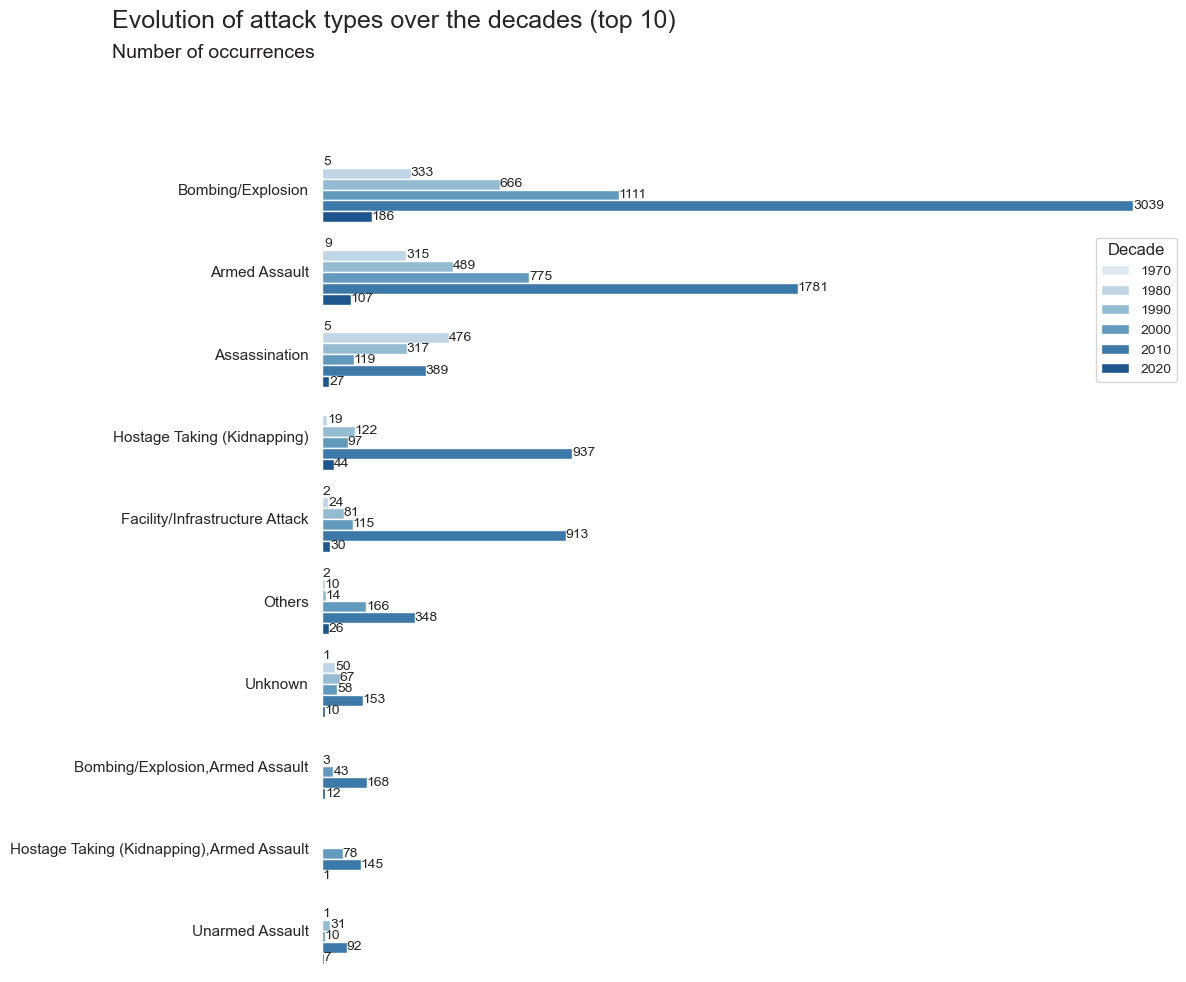

In [512]:
plt.figure(figsize=(12, 10))

palette = sns.color_palette("Blues", n_colors=len(concatenacao['DECADE'].unique()))

order = concatenacao.groupby('ATTACK TYPE')['COUNT'].sum().sort_values(ascending=False).index

sns.set_theme(style="white")

# Usar barplot para criar um gráfico de barras empilhadas
ax = sns.barplot(
    data = concatenacao, y = "ATTACK TYPE", x = "COUNT",
    hue = "DECADE", palette = palette, order = order, width = 0.8
)

# Adicionar os valores numéricos dentro das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Verificar se width é NaN
    if pd.isna(width):
        width = 0  # Substituir NaN por 0 para evitar erro

    # Adicionar o valor do número ao lado direito da barra, alinhado verticalmente com a altura da barra
    if width > 0:
        ax.text(x + width + 0.05, y + height / 2, f'{int(width)}', ha='left', va='center', fontsize = 10)
        
# Adicionar título
plt.suptitle('Evolution of attack types over the decades (top 10)', size = 18, ha='right', x = 0.57, y = 0.98)
plt.title('Number of occurrences', fontsize = 14, color = '#231F20', ha = "right", x = -0.008, y = 1.1)

ax.legend(title = 'Decade', bbox_to_anchor = (0.9, 0.9), bbox_transform = ax.transAxes, fontsize = 10, loc = 'upper left')

# Remover o rótulo do eixo y
ax.set_xlabel('')

ax.set_xticklabels([])

# Remover o rótulo do eixo y
ax.set_ylabel('')

# Ajustar layout
plt.tight_layout()

ax.set_frame_on(False)

plt.savefig('grafico4.png')

# Mostrar o gráfico
plt.show()



